# Library used

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

# Load data

In [5]:
df = pd.read_csv('Data/data_cleaned.csv')

In [7]:
df.iloc[0]

post_id                                                 262689253060335
post_text             Mấy hôm trước, mình ghé qua hiệu sách để mua t...
time                                                2023-07-09 21:38:24
images_description                    ['Có thể là hình ảnh về văn bản']
comments                                                            281
shares                                                               70
comments_full         [{'comment_id': '3093438647466273', 'commenter...
reaction_count                                                     2084
image_id                                              262685236394070.0
image_ids                                           ['262685236394070']
fetched_time                                 2023-11-11 22:15:24.216911
thích                                                              1744
yêu thích                                                           310
haha                                                            

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             132 non-null    int64  
 1   post_text           132 non-null    object 
 2   time                132 non-null    object 
 3   images_description  132 non-null    object 
 4   comments            132 non-null    int64  
 5   shares              132 non-null    int64  
 6   comments_full       132 non-null    object 
 7   reaction_count      132 non-null    int64  
 8   image_id            128 non-null    float64
 9   image_ids           132 non-null    object 
 10  fetched_time        132 non-null    object 
 11  thích               132 non-null    int64  
 12  yêu thích           132 non-null    int64  
 13  haha                132 non-null    int64  
 14  wow                 132 non-null    float64
 15  thương thương       132 non-null    int64  
 16  buồn    

In [18]:
df.describe()

post_id     comments       shares  reaction_count      image_id  \
count  1.320000e+02   132.000000   132.000000      132.000000  1.280000e+02   
mean   2.918301e+14   521.113636   222.340909     9864.992424  2.921568e+14   
std    1.733093e+13   748.477015   407.753964    18197.269534  1.734500e+13   
min    2.626893e+14    31.000000     7.000000     1663.000000  2.626852e+14   
25%    2.758353e+14   136.000000    46.250000     3536.250000  2.762509e+14   
50%    2.934215e+14   242.000000    91.500000     5242.500000  2.934213e+14   
75%    3.046936e+14   507.000000   186.250000     8221.750000  3.055945e+14   
max    3.250804e+14  4457.000000  2447.000000   133764.000000  3.250739e+14   

              thích     yêu thích          haha         wow  thương thương  \
count    132.000000    132.000000    132.000000  132.000000     132.000000   
mean    7215.545455   1778.318182    465.750000   10.621212     103.863636   
std    12486.994156   4177.537376   2399.841895   16.623597     253.472638   
min     1444.000000     10.000000      1.000000    0.000000       1.000000   
25%     2596.000000    268.000000      6.000000    2.000000      14.750000   
50%     4000.500000    742.000000     16.000000    5.000000      37.000000   
75%     6394.000000   1517.500000     96.750000   11.000000      84.750000   
max    93182.000000  39210.000000  25961.000000  107.000000    2179.000000   

               buồn    phẫn nộ  
count    132.000000  132.00000  
mean     281.840909    9.05303  
std     1240.802996   39.08814  
min        0.000000    0.00000  
25%        2.000000    0.00000  
50%        9.000000    1.00000  
75%       44.250000    3.00000  
max    12967.000000  390.00000

In [15]:
df['time'] = pd.to_datetime(df['time'])
print(df['time'][0])
print(df['time'][130])

2023-07-09 21:38:24
2023-11-04 21:51:39


# Reactions analysis

In [32]:
pecentage_reactions =  ((df['reaction_count'].sum() + df['comments'].sum() + df['shares'].sum()) / 250000) / len(df) * 100
pecentage_reactions

4.243378787878788

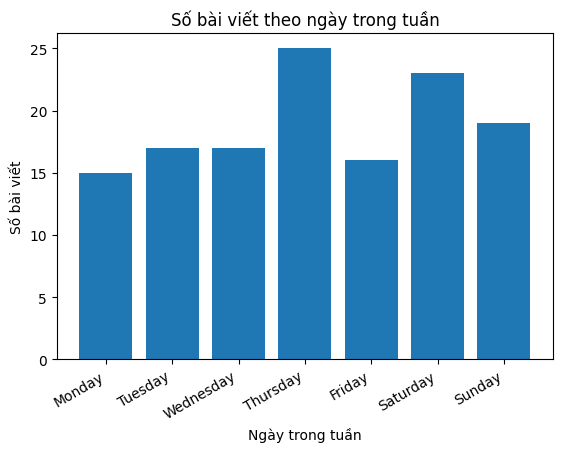

In [61]:
df['day_of_week'] = df['time'].dt.day_name()

# Đếm số bài viết theo ngày trong tuần
posts_by_day = df['day_of_week'].value_counts()

# Sắp xếp theo thứ tự ngày trong tuần
posts_by_day = posts_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Vẽ biểu đồ cột
plt.bar(posts_by_day.index, posts_by_day.values)
plt.title('Số bài viết theo ngày trong tuần')
plt.gcf().autofmt_xdate()
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số bài viết')
plt.show()

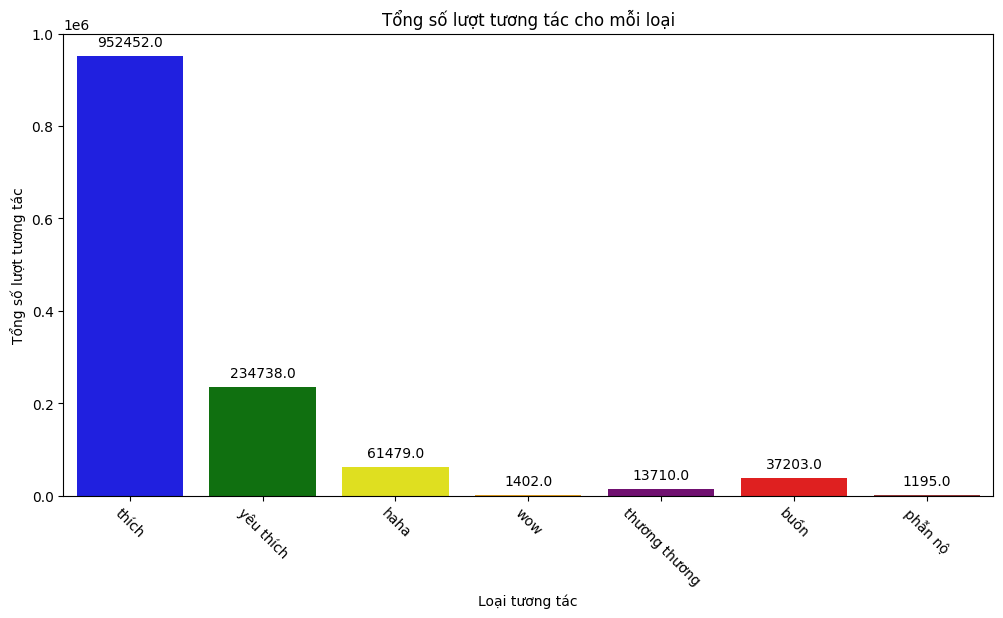

In [14]:
selected_columns = ['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ']
# Màu sắc tương ứng với từng loại cảm xúc
emotion_colors = {'thích': 'blue', 'yêu thích': 'green', 'haha': 'yellow', 'wow': 'orange', 'thương thương': 'purple', 'buồn': 'red', 'phẫn nộ': 'brown'}

# Tạo DataFrame mới với các cột tương tác
reactions_df = df[selected_columns].copy()

# Tính tổng số lượt tương tác cho mỗi loại
total_reactions = reactions_df.sum()

# Vẽ biểu đồ với tô màu theo sắc thái cảm xúc
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=total_reactions.index, y=total_reactions.values, palette=[emotion_colors[col] for col in total_reactions.index])

# Thêm chú thích về sắc thái cảm xúc tương ứng
for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Tổng số lượt tương tác cho mỗi loại')
plt.xlabel('Loại tương tác')
plt.ylabel('Tổng số lượt tương tác')
plt.xticks(rotation=-45)
plt.show()

## 1.Bài viết có tương tác nhiều nhất

In [5]:
# Tính tổng tương tác cho mỗi bài viết
df['total_reactions'] = df['reaction_count'] + df['comments'] + df['shares']

# Chọn 5 bài viết có tổng tương tác nhiều nhất
top_5_posts = df.nlargest(5, 'total_reactions')

# In thông tin về 5 bài viết có tổng tương tác nhiều nhất
top_5_posts[['post_id', 'post_text', 'total_reactions','time']].head(5)


post_id                                          post_text  \
92  301615012501092  CHỦ QUYỀN TỔ QUỐC LÀ TỐI THƯỢNG!\nTrong trận đ...   
27  272741568721770  Cùng lứa với Hoa hậu Ý Nhi (đi thi hoa hậu để ...   
24  271796398816287  THANH XUÂN CỦA NHỮNG NGƯỜI LÍNH ĐÁNG GIÁ BAO N...   
30  274234811905779  Đây là lần đầu chúng ta tham gia World Cup nữ ...   
9   267739662555294  MỘT ĐIỆP VIÊN CỦA VIỆT NAM ĐỦ KHIẾN NHỮNG JAME...   

    total_reactions                 time  
92           138901  2023-09-24 17:12:25  
27           128996  2023-07-29 16:11:00  
24           100015  2023-07-27 20:43:28  
30            49267  2023-08-01 15:59:12  
9             40551  2023-07-19 20:03:12

In [7]:
top_5_posts['time']

92    2023-09-24 17:12:25
27    2023-07-29 16:11:00
24    2023-07-27 20:43:28
30    2023-08-01 15:59:12
9     2023-07-19 20:03:12
Name: time, dtype: object

## 2. Mốc thời gian đăng bài thường xuyên

In [27]:
df['day'] = df['time'].dt.date

# Nhóm theo ngày và tính số lượng bài viết trung bình
average_posts_per_day = df.groupby('day').size().mean()

print(f"Số lượng bài viết trung bình theo ngày: {average_posts_per_day}")

Số lượng bài viết trung bình theo ngày: 1.4831460674157304


## 3. Số lượt tương tác thay đổi

# Post content

## Sentiment

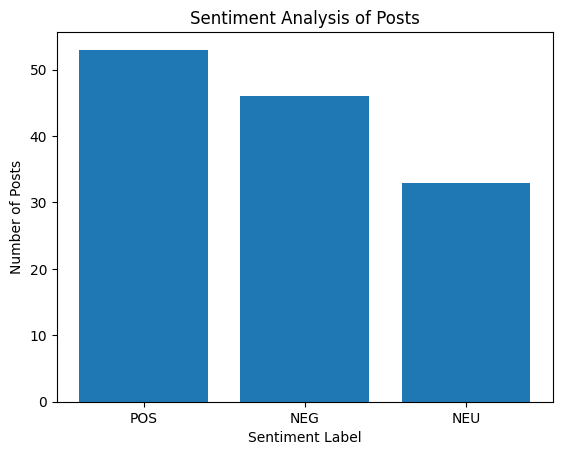

In [65]:
label_counts = df['max_label'].value_counts()
# Vẽ biểu đồ
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.title('Sentiment Analysis of Posts')
plt.show()

## Từ khóa xuất hiện nhiều nhất trong các bài đăng 

In [11]:
from wordcloud import WordCloud
with open('vietnamese-stopwords-dash.txt', 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file]
stop_words = set(lines)
stop_words.add('_tifosi')
stop_words.add('Tifosi')
stop_words.add('tifosi')
stop_words.add('k')
stop_words.add('ko')
def key_words(text):
    wordcloud = WordCloud(stopwords=stop_words,
                            background_color='white', 
                            max_words=300,
                            width=2000, height=1200,
                            ).generate(text)
    plt.figure(figsize=(40,20))
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
        

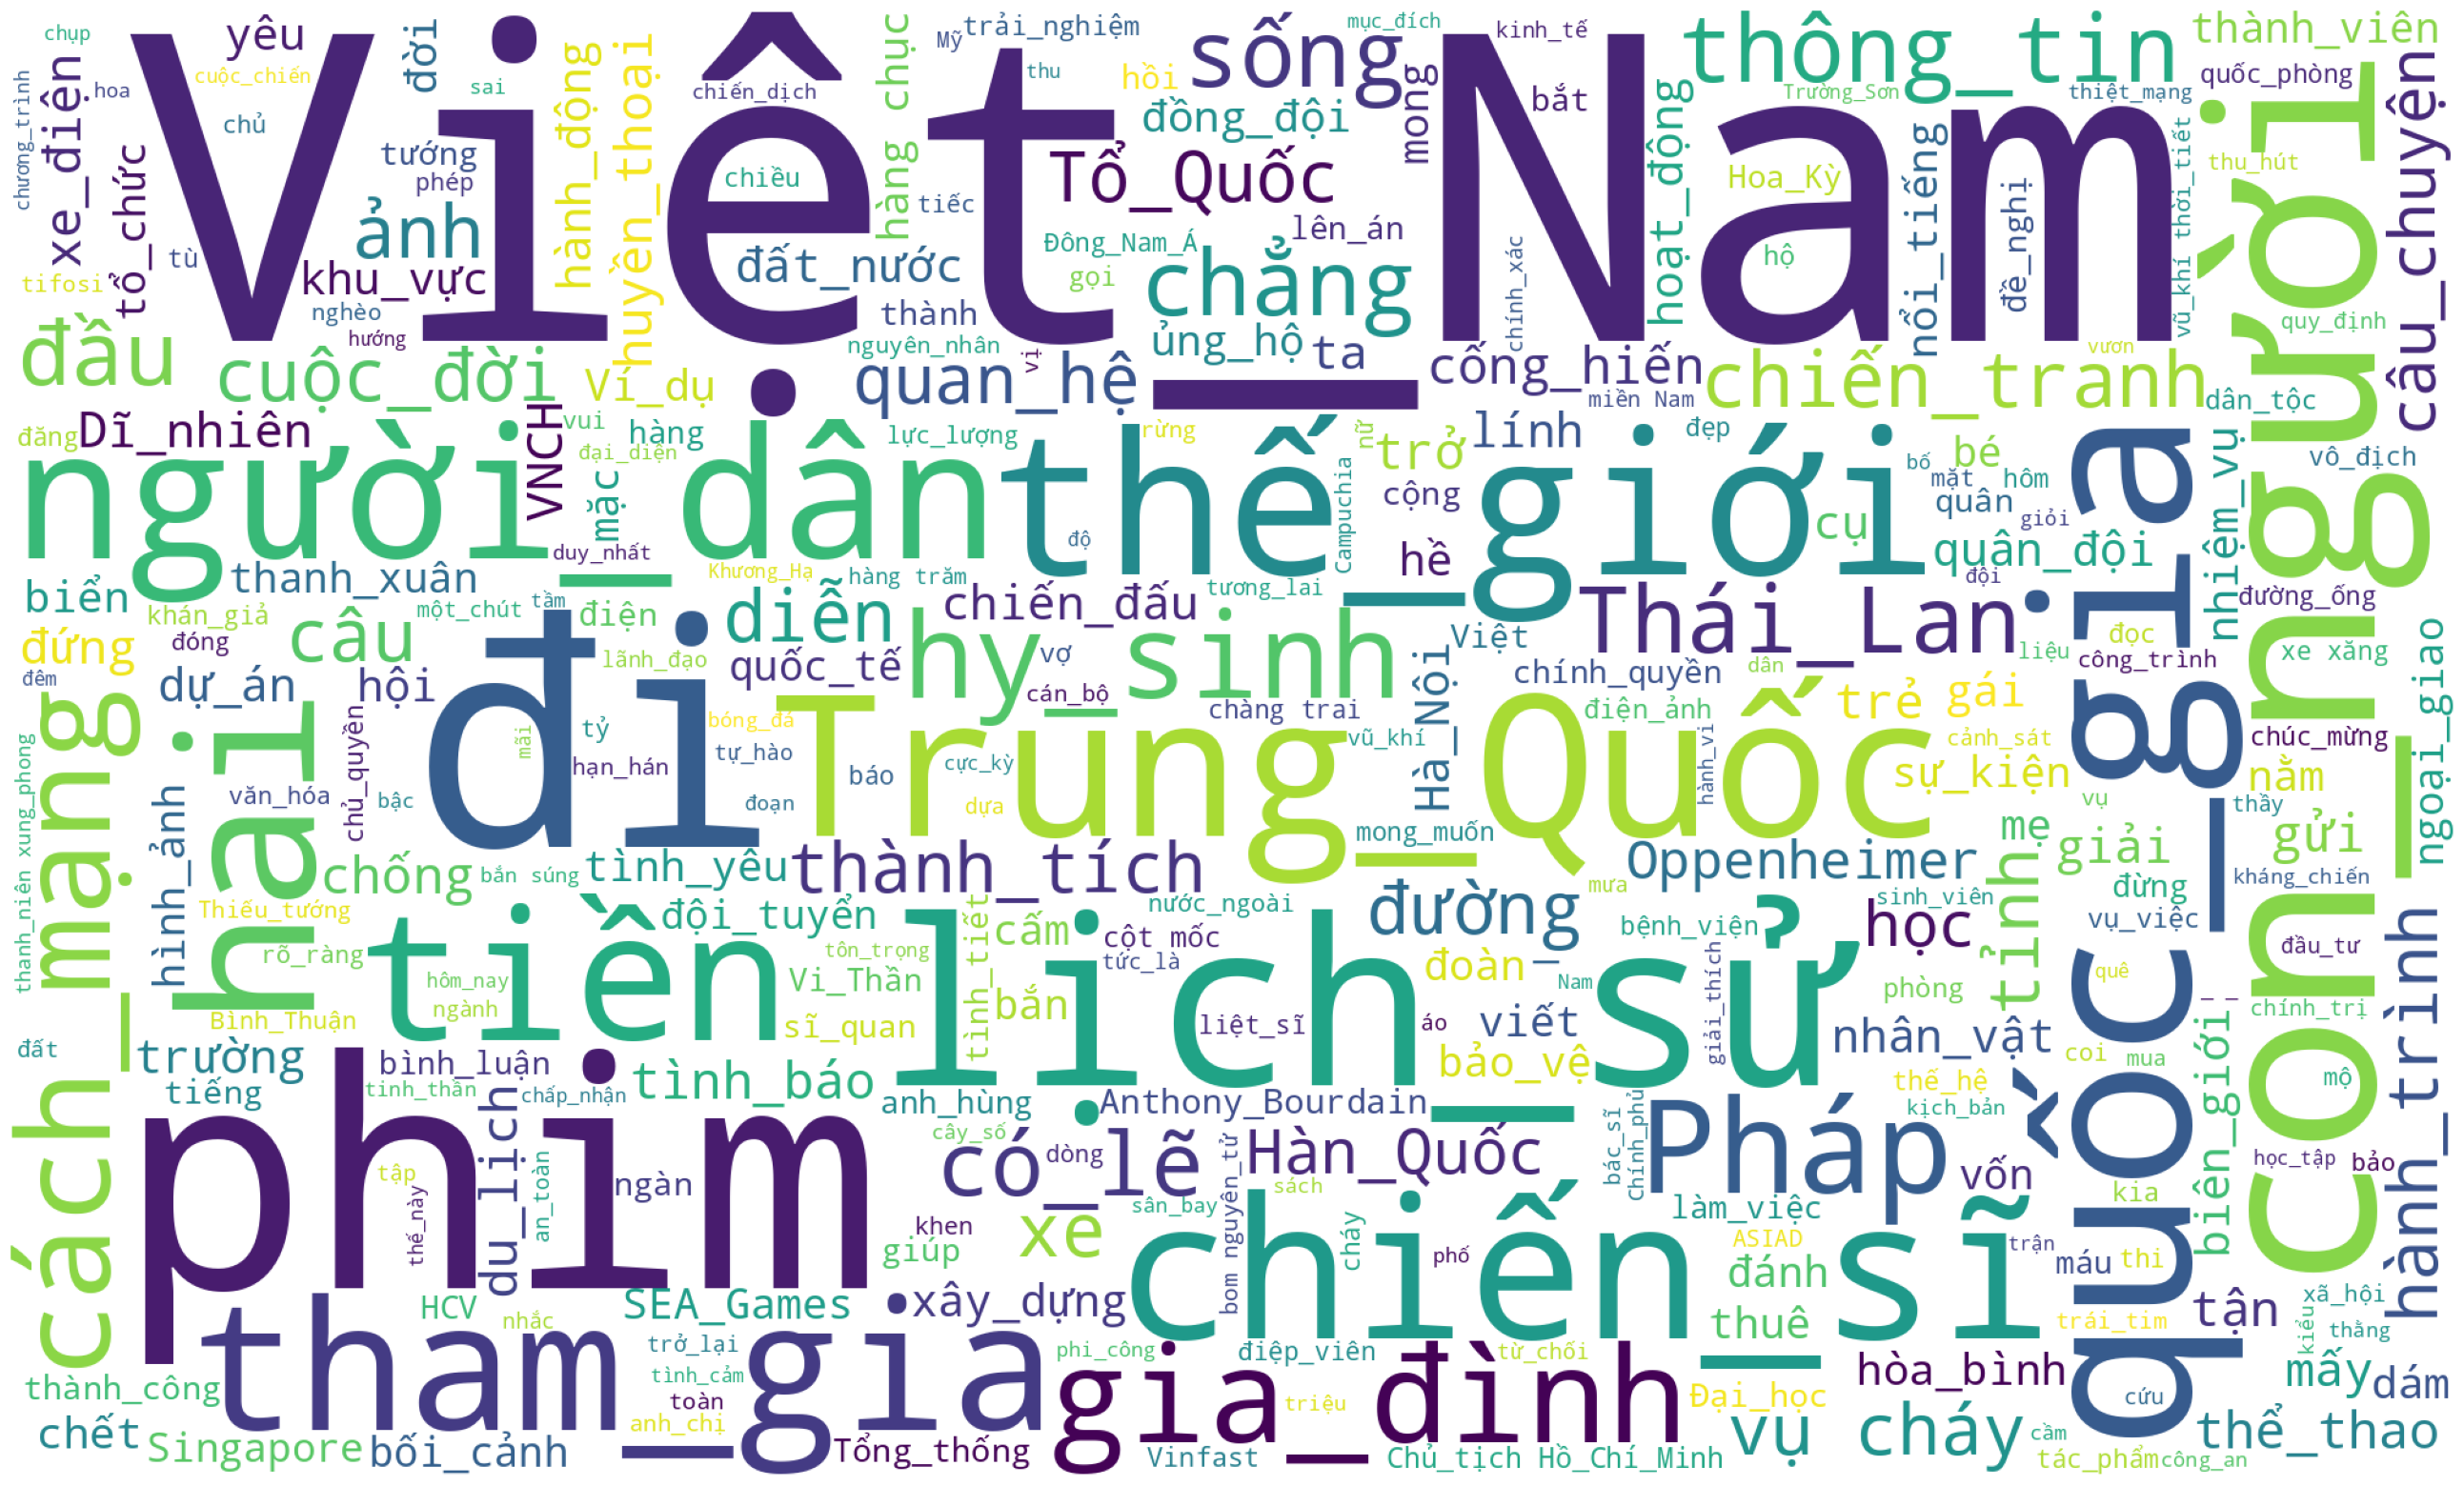

In [89]:
text = ' '.join(df['text'].dropna())
key_words(text)

# Comment analyze

In [5]:
total_comments = df['comments_full']
total_comments

0      [{'comment_id': '3093438647466273', 'commenter...
1      [{'comment_id': '1952312648458387', 'commenter...
2      [{'comment_id': '3426777637564486', 'commenter...
3      [{'comment_id': '6114478595327080', 'commenter...
4      [{'comment_id': '808461400985414', 'commenter_...
                             ...                        
127    [{'comment_id': '845338290929707', 'commenter_...
128    [{'comment_id': '244558971626807', 'commenter_...
129    [{'comment_id': '1513101629527507', 'commenter...
130    [{'comment_id': '346076121440334', 'commenter_...
131    [{'comment_id': '1052470815933500', 'commenter...
Name: comments_full, Length: 132, dtype: object

In [8]:
comment_0 = eval(total_comments[0])
comment_0

[{'comment_id': '3093438647466273',
  'commenter_id': '100079577852960',
  'commenter_name': 'Tifosi',
  'commenter_meta': 'Tác giả',
  'comment_text': 'Các bạn thông cảm nãy mình có đăng một số trích dẫn trong cuốn sách mà nó có quá nhiều từ khóa vi phạm tiêu chuẩn cộng đồng nên mình buộc phải xóa . Xin lỗi các bạn P / s : Mình có tật cắn móng tay',
  'comment_time': datetime.datetime(2023, 7, 11, 0, 0),
  'replies': [{'comment_id': '169167376057542',
    'commenter_id': '100079577852960',
    'commenter_name': 'Tifosi',
    'commenter_meta': 'Tác giả',
    'comment_text': 'Châu Long Thế à , bác cung cấp thêm thông tin cho mình xem . Mình có tìm thử mà không thấy . Cám ơn bác nhé .',
    'comment_time': datetime.datetime(2023, 7, 11, 0, 0)},
   {'comment_id': '1620551848453592',
    'commenter_id': '100014409915117',
    'commenter_name': 'Châu Long',
    'commenter_meta': None,
    'comment_text': 'Tifosi ông PR cho quyển này làm khỉ gì khi mà lão BN tác giả năm 2017 từng vác mặt lên

In [9]:
def extract_comment_texts(comments):
    all_comment_texts = []
    for comment in comments:
        all_comment_texts.append(comment['comment_text'])
        if 'replies' in comment:
            # Recursively extract comment texts from replies
            reply_texts = extract_comment_texts(comment['replies'])
            all_comment_texts.extend(reply_texts)
    return all_comment_texts

In [10]:
from underthesea import word_tokenize
comment_full = ""
for comment_i in total_comments:
    comment_i0 = eval(comment_i)
    all_comment_texts = extract_comment_texts(comment_i0)
    for comment_text in all_comment_texts:
        comment_text = word_tokenize(comment_text, format="text")
        comment_full += ' ' + comment_text

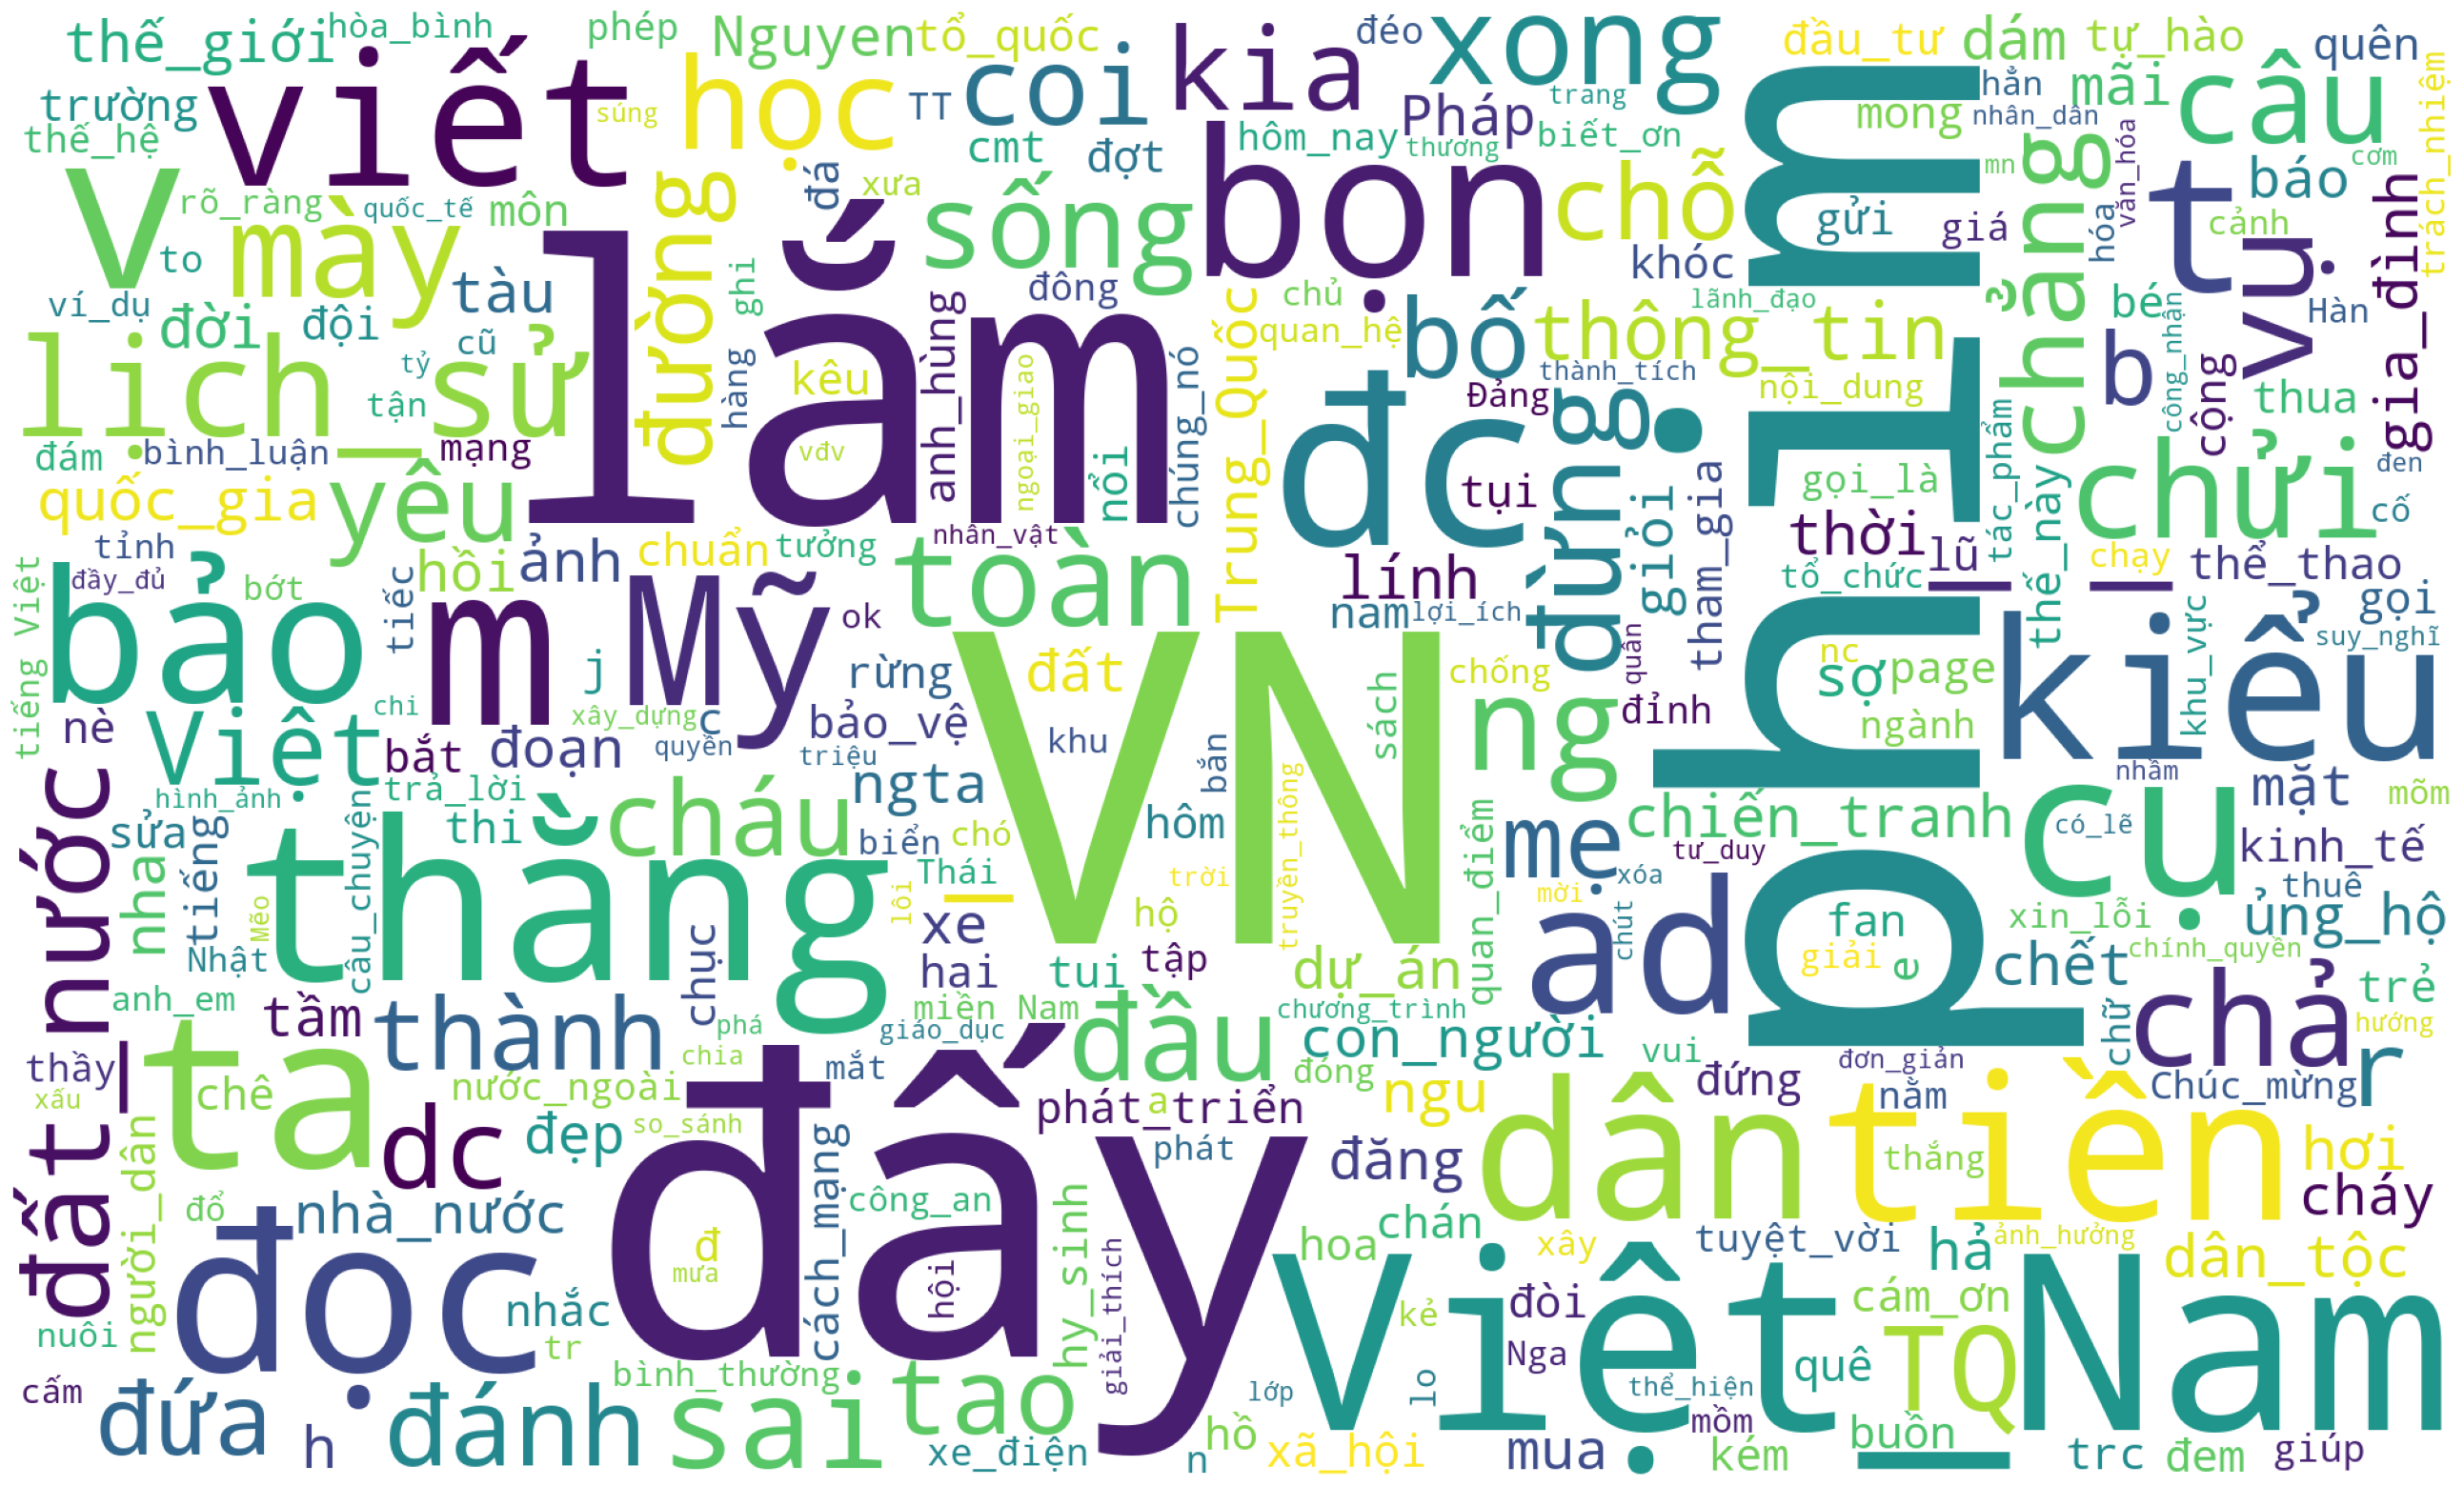

In [12]:
key_words(comment_full)

In [13]:
df['comment_sentiment'] = df['comment_sentiment'].apply(lambda x: eval(x))

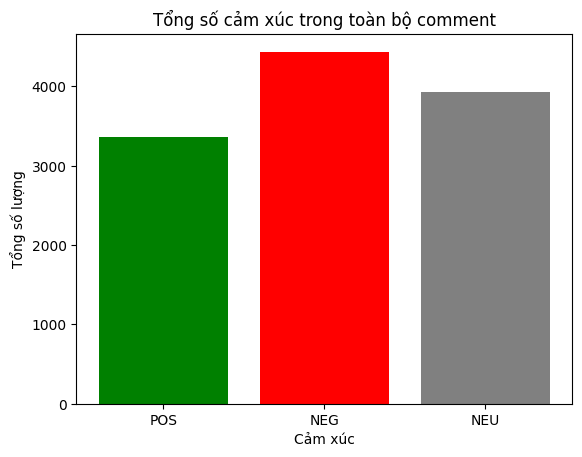

In [10]:
comment_sentiment = df['comment_sentiment']

# Tính tổng số cảm xúc cho mỗi loại trên toàn bộ DataFrame
total_sentiment = {'POS': 0, 'NEG': 0, 'NEU': 0}

for comment in comment_sentiment:
    for emotion, count in comment.items():
        total_sentiment[emotion] += count

# Chuyển đổi dữ liệu thành DataFrame để dễ vẽ biểu đồ
total_df = pd.DataFrame(list(total_sentiment.items()), columns=['Emotion', 'Total'])

# Vẽ biểu đồ cột
plt.bar(total_df['Emotion'], total_df['Total'], color=['green', 'red', 'gray'])
plt.xlabel('Cảm xúc')
plt.ylabel('Tổng số lượng')
plt.title('Tổng số cảm xúc trong toàn bộ comment')
plt.show()

# Users regularly interact

In [4]:
df_profile = pd.read_csv('Data\data_profile_cleaned.csv')

In [5]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                148 non-null    int64  
 1   Name              148 non-null    object 
 2   Thông tin cơ bản  117 non-null    object 
 3   Công việc         62 non-null     object 
 4   Học vấn           71 non-null     object 
 5   sex               105 non-null    object 
 6   birth_year        17 non-null     float64
 7   academic_level    71 non-null     float64
 8   location          99 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.5+ KB


In [6]:
df_profile.head(20)

id                Name  \
0   100033354258162          Phương Nhi   
1         592223021           Thuy Tran   
2   100000081973993           Vitel Bắc   
3   100000259568337    Thành Cát Tư Hãn   
4   100007422363503  Lê Công Tuấn Giang   
5   100004804114709             Văn Hữu   
6   100016492805555  Nguyễn Thế Thuỳ Vy   
7   100065048167982            Đạt Phúc   
8   100004043245245   Nguyễn Phương Nam   
9   100007951383258            Sơn Đặng   
10        601174280           Trung Van   
11  100068561913168             Linh Vũ   
12  100086344524889          Trần Thuật   
13        733907606     Trần Ngọc Hoàng   
14  100034988861830             Dưa Hấu   
15       1261013965           Biao Chan   
16  100048309724971               Hồ Vy   
17  100042012673766      Bành Đức Trung   
18  100001707714163         Nhật Huy Hồ   
19  100001885097517         Nam Hà Tĩnh   

                                     Thông tin cơ bản  \
0         25 tháng 10, 2001\nNgày sinh\nNữ\nGiới tính   
1                                       Nữ\nGiới tính   
2                                      Nam\nGiới tính   
3                                      Nam\nGiới tính   
4                                      Nam\nGiới tính   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                      1996\nNăm sinh\nNam\nGiới tính   
9                                      Nam\nGiới tính   
10                                     Nam\nGiới tính   
11                               3 tháng 9\nNgày sinh   
12                                                NaN   
13  Nam\nGiới tính\nEnglish language và Japanese l...   
14                                      Nữ\nGiới tính   
15         Nam\nGiới tính\nEnglish language\nNgôn ngữ   
16                                                NaN   
17                                                NaN   
18         Nam\nGiới tính\nEnglish language\nNgôn ngữ   
19                                     Nam\nGiới tính   

                                            Công việc  \
0                                                 NaN   
1   Tap Hoa Ba Thuy Beo\nOwner and CEO\n16 tháng 1...   
2                               đại học nông nghiệp I   
3                                                 NaN   
4   Công ty Cổ Phần LRV Việt Nam- Ắc Quy Enimac, Ắ...   
5                       nhân dân.\ncông nhân\nCần Thơ   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                         IBM\nThành phố Hồ Chí Minh   
11                                                NaN   
12                                                NaN   
13  BeeMob\nTừ 9 tháng 1, 2021 đến nay\nVân Hồ Log...   
14                                             Hà Nội   
15  Holiday Villa Hotel and Residence Doha\nRecept...   
16                                                NaN   
17                                                NaN   
18                                                Huế   
19                   Trường THPT Hà Huy Tập - Hà Tĩnh   

                                              Học vấn  sex  birth_year  \
0                                                 NaN   Nữ      2001.0   
1                                                 NaN   Nữ         NaN   
2   Đại học Tổng Hợp\nCao đẳng/Đại học\nTốt nghiệp...  Nam         NaN   
3                                                 NaN  Nam         NaN   
4   National Economics University, NEU\nProject ma...  Nam         NaN   
5                                                 NaN  NaN         NaN   
6                                                 NaN  NaN         NaN   
7                                                 NaN  NaN         NaN   
8   Trường THPT Nguyễn Trãi - Ninh Hòa - Khánh Hòa.

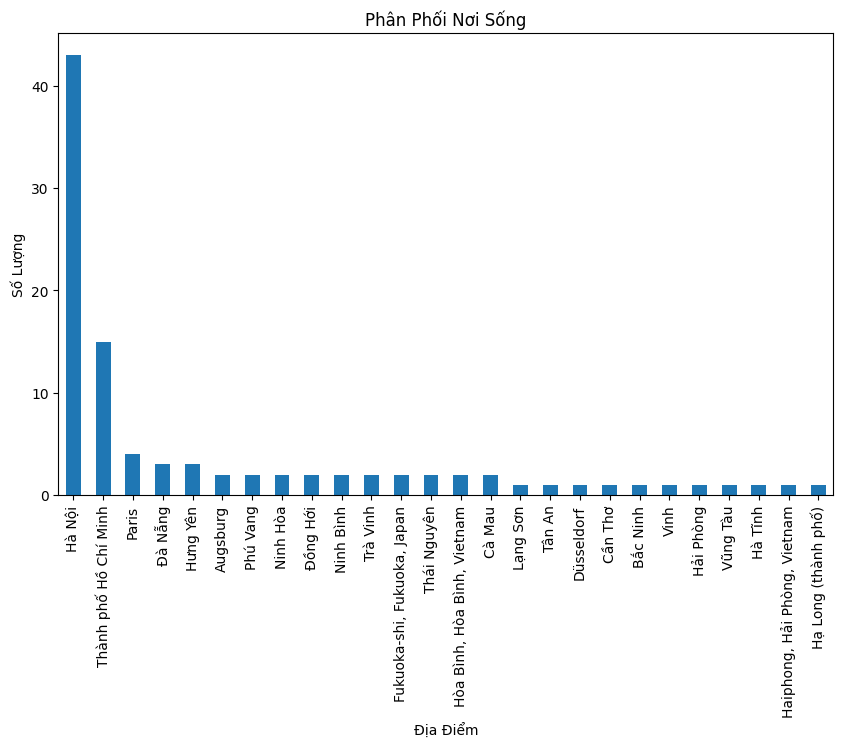

In [6]:
location_counts = df_profile['location'].value_counts()

# Vẽ biểu đồ cột
location_counts.plot(kind='bar', figsize=(10, 6), title='Phân Phối Nơi Sống')
plt.xlabel('Địa Điểm')
plt.ylabel('Số Lượng')
plt.show()

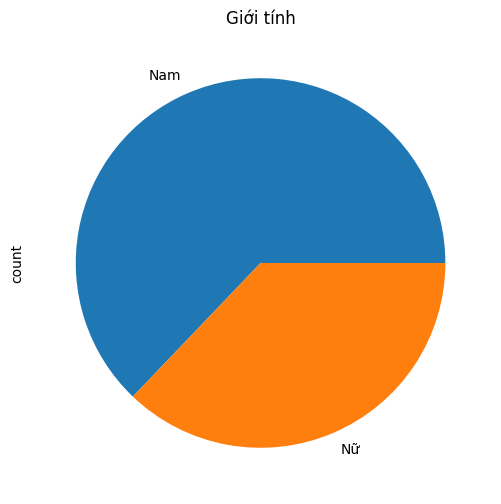

In [7]:
sex_counts = df_profile['sex'].value_counts()
sex_counts.plot(kind='pie', figsize=(10, 6), title='Giới tính')
plt.show()

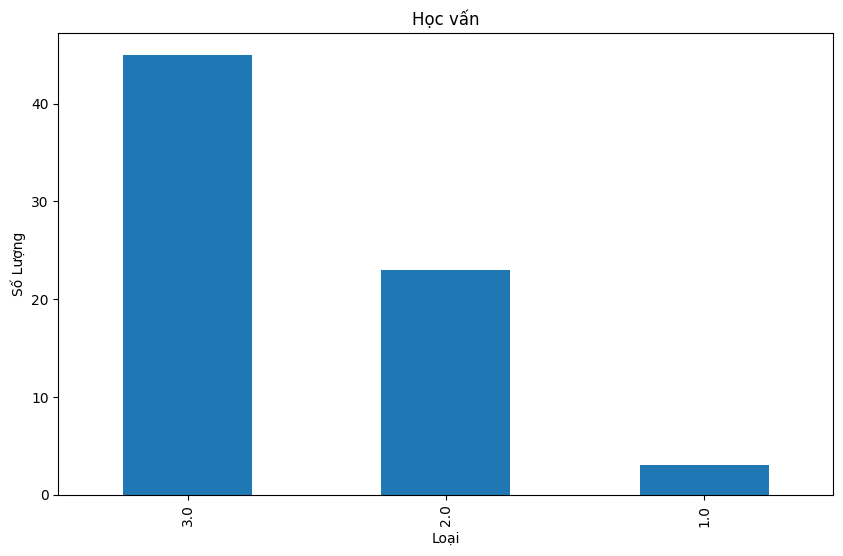

In [10]:
academic_level_counts = df_profile['academic_level'].value_counts()

# Vẽ biểu đồ cột
academic_level_counts.plot(kind='bar', figsize=(10, 6), title='Học vấn')
plt.xlabel('Loại')
plt.ylabel('Số Lượng')
plt.show()